In [1]:
'''
id : 각 사람별 id
gender : 성별
height : 키
weight : 몸무게
family_history_with_overweight: 가족 병력 [yes/no]
favc:  Frequent consumption of high caloric food [yes/no]
fcvc: Frequency of consumption of vegetables [수치형 1~3 연속형?]
NCP: Number of main meals[수치형 1~4 연속형]
CAEC: Consumption of food between meals[범주형 4종류]
SMOKE: 흡연 여부 [yes/no]
CH2O:  Consumption of water daily[1~3 연속형]
SCC: Calories consumption monitoring [범주형 yes/no]
FAF: Physical activity frequency [연속형 0~3]
TUE: Time using technology devices [연속형 0~2]
CALC: Consumption of alcohol[범주형 3종류]
MTRANS: 사용하는 교통편 [범주형 5종류]
-----------------------------------------------------------------------------------------------------------------
NObeyesdad: 예측 라벨! 7종류
'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'
'''

"\nid : 각 사람별 id\ngender : 성별\nheight : 키\nweight : 몸무게\nfamily_history_with_overweight: 가족 병력 [yes/no]\nfavc:  Frequent consumption of high caloric food [yes/no]\nfcvc: Frequency of consumption of vegetables [수치형 1~3 연속형?]\nNCP: Number of main meals[수치형 1~4 연속형]\nCAEC: Consumption of food between meals[범주형 4종류]\nSMOKE: 흡연 여부 [yes/no]\nCH2O:  Consumption of water daily[1~3 연속형]\nSCC: Calories consumption monitoring [범주형 yes/no]\nFAF: Physical activity frequency [연속형 0~3]\nTUE: Time using technology devices [연속형 0~2]\nCALC: Consumption of alcohol[범주형 3종류]\nMTRANS: 사용하는 교통편 [범주형 5종류]\n-----------------------------------------------------------------------------------------------------------------\nNObeyesdad: 예측 라벨! 7종류\n'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',\n'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'\n"

In [2]:
# 라이브러리 임포트
import pandas as pd

C:\Users\dldkr\AppData\Local\Temp\ipykernel_26916\170059301.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
# 데이터 읽어오기
train_df = pd.read_csv('../csv/train.csv')
test_df = pd.read_csv('../csv/test.csv')
test_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


* EDA 시각화

In [6]:
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

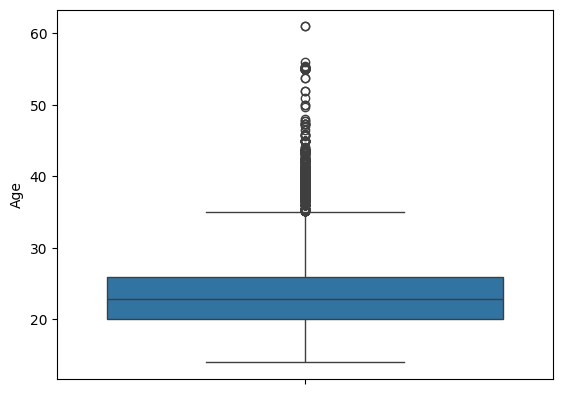

In [9]:
sns.boxplot(y='Age', data = train_df)
plt.show()

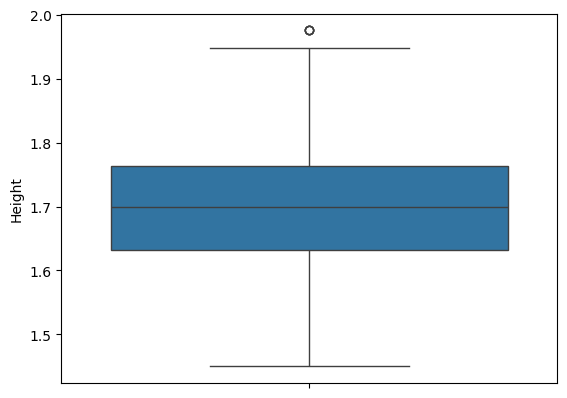

In [10]:
sns.boxplot(y='Height', data = train_df)
plt.show()

In [11]:
# train_df 데이터프레임에 정수(int) 또는 부동소수점(float) 타입의 열을 선택
numeric_columns = train_df.select_dtypes(include=['int', 'float']).columns
    
# 선택된 열을 사용하여 새로운 데이터프레임 생성
numeric_df = train_df[numeric_columns]

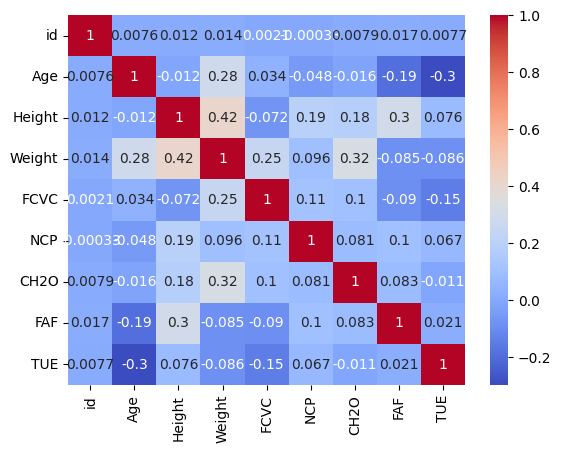

In [12]:
## 상관관계 행렬

corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

* 전처리 시작

In [13]:
# 전처리 전, 하나의 데이터프레임으로 합치기
all_df = pd.concat([train_df,test_df],sort=False).reset_index(drop=True)
all_df

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation,NaN
34594,34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,NaN
34595,34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation,NaN
34596,34596,Male,21.000000,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation,NaN


In [14]:
all_df.isnull().sum()
# 예측할 변수인 Nobeyesdad 를 제외하면 결측치는 존재하지 않는다.

id                                    0
Gender                                0
Age                                   0
Height                                0
Weight                                0
family_history_with_overweight        0
FAVC                                  0
FCVC                                  0
NCP                                   0
CAEC                                  0
SMOKE                                 0
CH2O                                  0
SCC                                   0
FAF                                   0
TUE                                   0
CALC                                  0
MTRANS                                0
NObeyesdad                        13840
dtype: int64

In [15]:
# 의미없는 변수 제거(규칙성이 없거나 하는 등등)
all_df = all_df.drop(['id'],axis=1)
all_df.head()
# 규칙성이 없는 id열 제거

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [16]:
# 카테고리 변수를 수치로 인코딩하기
categories = all_df.columns[all_df.dtypes=='object']
print(categories)

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


* 인코딩

In [17]:
''' 
- 원-핫 인코딩: (명목척도 인 것)
gender(2), family_history_with_overweight(2), favc(2), smoke(2), scc(2), mtrans(5)

- 라벨 인코딩: (서열척도 인 것)
caec(4), calc(3)
'''

' \n- 원-핫 인코딩: (명목척도 인 것)\ngender(2), family_history_with_overweight(2), favc(2), smoke(2), scc(2), mtrans(5)\n\n- 라벨 인코딩: (서열척도 인 것)\ncaec(4), calc(3)\n'

In [18]:
# 원-핫 인코딩
all_df = pd.get_dummies(all_df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE',
       'SCC', 'MTRANS'], drop_first=True)
all_df

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,Sometimes,2.763573,0.000000,0.976473,Sometimes,Overweight_Level_II,True,True,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,Frequently,2.000000,1.000000,1.000000,no,Normal_Weight,False,True,True,False,False,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,Sometimes,1.910378,0.866045,1.673584,no,Insufficient_Weight,False,True,True,False,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,Sometimes,1.674061,1.467863,0.780199,Sometimes,Obesity_Type_III,False,True,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,Sometimes,1.979848,1.967973,0.931721,Sometimes,Overweight_Level_II,True,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,23.327836,1.721384,78.030383,2.813234,3.000000,Sometimes,1.000000,0.807076,0.778632,Sometimes,NaN,True,True,False,False,False,False,False,True,False
34594,29.000000,1.590000,62.000000,3.000000,3.000000,Sometimes,2.000000,0.000000,0.000000,Sometimes,NaN,False,False,True,False,False,False,False,True,False
34595,22.935612,1.585547,44.376637,3.000000,2.273740,Frequently,2.000000,1.949840,1.000000,Sometimes,NaN,False,False,True,False,False,False,False,True,False
34596,21.000000,1.620000,53.000000,2.000000,3.000000,Sometimes,2.000000,3.000000,2.000000,no,NaN,True,True,True,False,False,False,False,True,False


In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
# 라벨 인코딩
le_cat = ['CAEC', 'CALC']

for cat in le_cat:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes == 'object':
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

CAEC
CALC


In [21]:
all_df

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2,2.763573,0.000000,0.976473,2,Overweight_Level_II,True,True,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,1,2.000000,1.000000,1.000000,3,Normal_Weight,False,True,True,False,False,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,2,1.910378,0.866045,1.673584,3,Insufficient_Weight,False,True,True,False,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,2,1.674061,1.467863,0.780199,2,Obesity_Type_III,False,True,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,2,1.979848,1.967973,0.931721,2,Overweight_Level_II,True,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,23.327836,1.721384,78.030383,2.813234,3.000000,2,1.000000,0.807076,0.778632,2,NaN,True,True,False,False,False,False,False,True,False
34594,29.000000,1.590000,62.000000,3.000000,3.000000,2,2.000000,0.000000,0.000000,2,NaN,False,False,True,False,False,False,False,True,False
34595,22.935612,1.585547,44.376637,3.000000,2.273740,1,2.000000,1.949840,1.000000,2,NaN,False,False,True,False,False,False,False,True,False
34596,21.000000,1.620000,53.000000,2.000000,3.000000,2,2.000000,3.000000,2.000000,3,NaN,True,True,True,False,False,False,False,True,False


* 표준화  
평균0, 표준편차1로 바꾸기
>통상적으로는 표준화를 통해 이상치를 제거하고, 그 다음 데이터를 정규화 해 상대적 크기에 대한 영향력을 줄인 다음 분석을 시작한다고 한다.  
이상치가 제거하지 않을 것이라면, 표준화 과정은 생략해도 됨. 바로 정규화 하자.

In [22]:
from sklearn.preprocessing import StandardScaler

In [24]:
# 데이터프레임에서 수치형 변수 추출
numerical_columns = all_df.select_dtypes(include=['int', 'float']).columns
numerical_columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'FAF', 'TUE',
       'CALC'],
      dtype='object')

In [25]:
# StandardScaler 객체 생성
scaler = StandardScaler()
all_df[numerical_columns] = scaler.fit_transform(all_df[numerical_columns])
all_df[numerical_columns]

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC
0,0.097125,0.003156,-0.228998,-0.835030,0.319748,0.339299,1.202683,-1.166547,0.598886,-0.474573
1,-1.026697,-1.589647,-1.167979,-0.835030,0.343353,-1.871865,-0.049985,0.025192,0.637808,1.631271
2,-1.026697,0.133563,-1.428102,-1.059354,-1.901298,0.339299,-0.197013,-0.134447,1.752153,1.631271
3,-0.511666,0.125258,1.659050,1.042690,0.343353,0.339299,-0.584699,0.582763,0.274179,-0.474573
4,1.352648,2.440044,0.232618,0.441189,-1.110191,0.339299,-0.083045,1.178764,0.524850,-0.474573
...,...,...,...,...,...,...,...,...,...,...
34593,-0.097389,0.246472,-0.367527,0.691996,0.343353,0.339299,-1.690520,-0.204723,0.271587,-0.474573
34594,0.891978,-1.248327,-0.977671,1.042690,0.343353,0.339299,-0.049985,-1.166547,-1.016544,-0.474573
34595,-0.165803,-1.298990,-1.648446,1.042690,-0.683018,-1.871865,-0.049985,1.157154,0.637808,-0.474573
34596,-0.503422,-0.907007,-1.320226,-0.835030,0.343353,0.339299,-0.049985,2.408672,2.292160,1.631271


<Axes: >

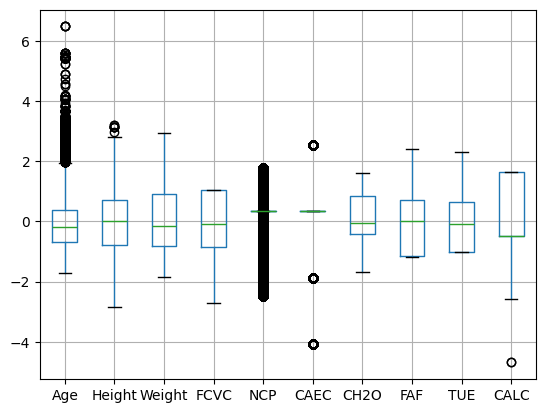

In [26]:
## 이상치 확인
all_df[numerical_columns].boxplot()

* 정규화  
원-핫인코딩된 범주형 또한 0과 1 즉 범위가 0~1이므로,  
이상치를 제거하지 않았더라도, 정규화가 필요하다고 판단

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# 수치형 변수를 Min-Max 정규화하여 변환
all_df[numerical_columns] = scaler.fit_transform(all_df[numerical_columns])

all_df

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,NObeyesdad,Gender_Male,family_history_with_overweight_yes,FAVC_yes,SMOKE_yes,SCC_yes,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.222192,0.471694,0.338497,0.500000,0.661099,0.666667,0.881787,0.000000,0.488237,0.666667,Overweight_Level_II,True,True,True,False,False,False,False,True,False
1,0.085106,0.207547,0.142792,0.500000,0.666667,0.333333,0.500000,0.333333,0.500000,1.000000,Normal_Weight,False,True,True,False,False,False,False,False,False
2,0.085106,0.493321,0.088577,0.440267,0.137228,0.666667,0.455189,0.288682,0.836792,1.000000,Insufficient_Weight,False,True,True,False,False,False,False,True,False
3,0.147931,0.491943,0.732007,1.000000,0.666667,0.666667,0.337031,0.489288,0.390100,0.666667,Obesity_Type_III,False,True,True,False,False,False,False,True,False
4,0.375342,0.875823,0.434708,0.839832,0.323824,0.666667,0.489924,0.655991,0.465861,0.666667,Overweight_Level_II,True,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,0.198465,0.512045,0.309624,0.906617,0.666667,0.666667,0.000000,0.269025,0.389316,0.666667,NaN,True,True,False,False,False,False,False,True,False
34594,0.319149,0.264151,0.182457,1.000000,0.666667,0.666667,0.500000,0.000000,0.000000,0.666667,NaN,False,False,True,False,False,False,False,True,False
34595,0.190119,0.255749,0.042652,1.000000,0.424580,0.333333,0.500000,0.649947,0.500000,0.666667,NaN,False,False,True,False,False,False,False,True,False
34596,0.148936,0.320755,0.111061,0.500000,0.666667,0.666667,0.500000,1.000000,1.000000,1.000000,NaN,True,True,True,False,False,False,False,True,False


* 전처리 완료

In [30]:
# 다시 학습데이터와 테스트 데이터로 되돌리기

train_X = all_df[~all_df['NObeyesdad'].isnull()].drop('NObeyesdad',axis=1).reset_index(drop=True)
train_Y = train_df['NObeyesdad']

test_X = all_df[all_df['NObeyesdad'].isnull()].drop('NObeyesdad',axis=1).reset_index(drop=True)

In [31]:
# 목적변수 라벨인코딩
le = LabelEncoder()
le = le.fit(train_Y)
train_Y = le.transform(train_Y)
train_Y

array([6, 1, 0, ..., 3, 6, 3])